# Notebook description

I put this notebook together before Rob showed us BoxScore. I was brainstorming for new ideas to display Kensho's study results after we received LP feedback on them. I presented this during a few of our team catch up meetings. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import bokeh
from bokeh.plotting import *
from collections import OrderedDict
from bokeh.io import output_notebook
from bokeh.models import Toggle, BoxAnnotation, CustomJS, HoverTool
from bokeh.layouts import layout
output_notebook()

import colorlover as cl

from IPython.display import display

from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,undo,redo,tap,previewsave,box_select,poly_select,lasso_select,hover"

Loading BokehJS ...

In [2]:
def GetData(url):
    
    df = pd.read_csv(url)
    
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = (df[col].str.strip('%').astype('float').divide(1.))
        except ValueError:
            pass
    return df

In [3]:
df1 = pd.read_csv('C:/Users/zanderl/Downloads/fomc-rate-decision-impact-study-1-2-26-2018-results.csv')

In [4]:
df2 = GetData('C:/Users/zanderl/Documents/Kensho General Items/Research Study Outputs/FOMC Interest Rates Agg Stats/FOMC Lowers Rates R2000 t1.csv')

In [5]:
df2.index = df2['Symbol']
df2.drop(['Symbol',
          'Sector',
          'Average of n Annualized holding periods Volatility',
         'Average of n Annualized holding periods Volatility (Beta Adjusted)'],axis=1,inplace=True)

#df2.drop(['Symbol','Name'],axis=1,inplace=True)
#df2.dropna(axis=0,inplace=True)

In [30]:
df1.head()

,Symbol,Name,Average Percent Return,Average Absolute Daily Return,Average Daily Return,Average Daily non-holding Return,Trade Period Beta with Benchmark,Average Beta Adjusted Return,Average Absolute Daily Beta Adjusted Return,Average Daily Beta Adjusted Return,...,Sharpe Ratio,Simple Excess Trade Return vs S&P 500,% Trades Positive (Simple Excess Return Basis),Sixtieth Percentile of Returns,Standard Deviation of Trade Percent Return,Std Error of Daily Study Period Return (Annualized),Daily Study Period Volatility (Annualized),Study Period Beta with Benchmark,Trade Excess Return vs S&P 500,Twenty-fifth percentile of returns.1
0,SP2550TR,S&P 500 Retailing Industry Group Total Return,-0.01,0.01,0.0,0.0,0.93,-0.01,0.01,0.0,...,-2.31,-0.01,0.53,-0.01,0.02,0.0,0.29,1.04,-0.01,-0.02
1,SP1510TR,S&P 500 Materials Industry Group Total Return,-0.02,0.01,0.0,0.0,0.94,-0.01,0.01,0.0,...,-3.71,-0.01,0.29,0.00,0.03,0.0,0.28,1.00,-0.01,-0.03
2,SP2520TR,S&P 500 Consumer Durables & Apparel Industry G...,-0.01,0.01,0.0,0.0,0.94,-0.01,0.01,0.0,...,-2.53,-0.01,0.29,0.00,0.02,0.0,0.26,0.94,-0.01,-0.03
3,SP2530TR,S&P 500 Consumer Services Industry Group Total...,-0.01,0.01,0.0,0.0,0.91,-0.01,0.01,0.0,...,-2.75,-0.01,0.41,-0.01,0.03,0.0,0.23,0.82,-0.01,-0.03
4,SP2030TR,S&P 500 Transportation Industry Group Total Re...,-0.01,0.01,0.0,0.0,1.06,-0.01,0.01,0.0,...,-2.53,-0.01,0.35,-0.01,0.02,0.0,0.26,0.90,-0.01,-0.02


In [7]:
df2.head()

,Name,Average Percent Return,Average Absolute Daily Return,Average Daily Return,Average Daily non-holding Return,Trade Period Beta with Benchmark,Average Beta Adjusted Return,Average Absolute Daily Beta Adjusted Return,Average Daily Beta Adjusted Return,Average Daily non-holding Beta Adjusted Return,...,Sharpe Ratio,Simple Excess Trade Return vs S&P 500,% Trades Positive (Simple Excess Return Basis),Sixtieth Percentile of Returns,Standard Deviation of Trade Percent Return,Std Error of Daily Study Period Return (Annualized),Daily Study Period Volatility (Annualized),Study Period Beta with Benchmark,Trade Excess Return vs S&P 500,Twenty-fifth percentile of returns.1
Symbol,,,,,,,,,,,,,,,,,,,,,
AXON,Axovant Sciences Ltd.,17.78,5.37,3.33,-0.15,2.75,18.95,4.63,3.61,-0.20,...,7.97,20.39,100.00,23.29,17.19,3.23,106.32,0.81,18.60,3.39
STRP,Straight Path Communications Inc.,13.45,4.35,2.56,0.27,1.74,14.15,4.14,2.71,0.23,...,2.66,23.07,57.14,2.08,41.51,3.32,179.73,0.56,14.04,-3.25
ADPT,Adeptus Health Inc Class A,11.78,5.49,2.25,-0.50,-0.23,12.47,5.38,2.39,-0.52,...,2.71,17.78,60.00,-0.43,32.59,4.72,242.56,0.55,12.17,-5.02
RYI,Ryerson Holding Corporation,9.58,4.82,1.85,-0.07,3.37,10.91,4.06,2.12,-0.12,...,4.19,11.51,60.00,13.03,14.99,2.98,121.09,0.87,10.42,-4.52
NHTC,Natural Health Trends Corp.,8.76,3.73,1.71,-0.14,-0.02,9.03,3.95,1.77,-0.17,...,4.76,9.78,70.59,14.69,12.68,2.38,414.94,0.44,8.85,-2.33


In [8]:
correls_df1 = df1.corr()
correls_df2 = df2.corr()

In [9]:
#correls_df1.head()
#correls_df2.head()

In [10]:
#correls_df1.fillna(value=0,axis=0,inplace=True)

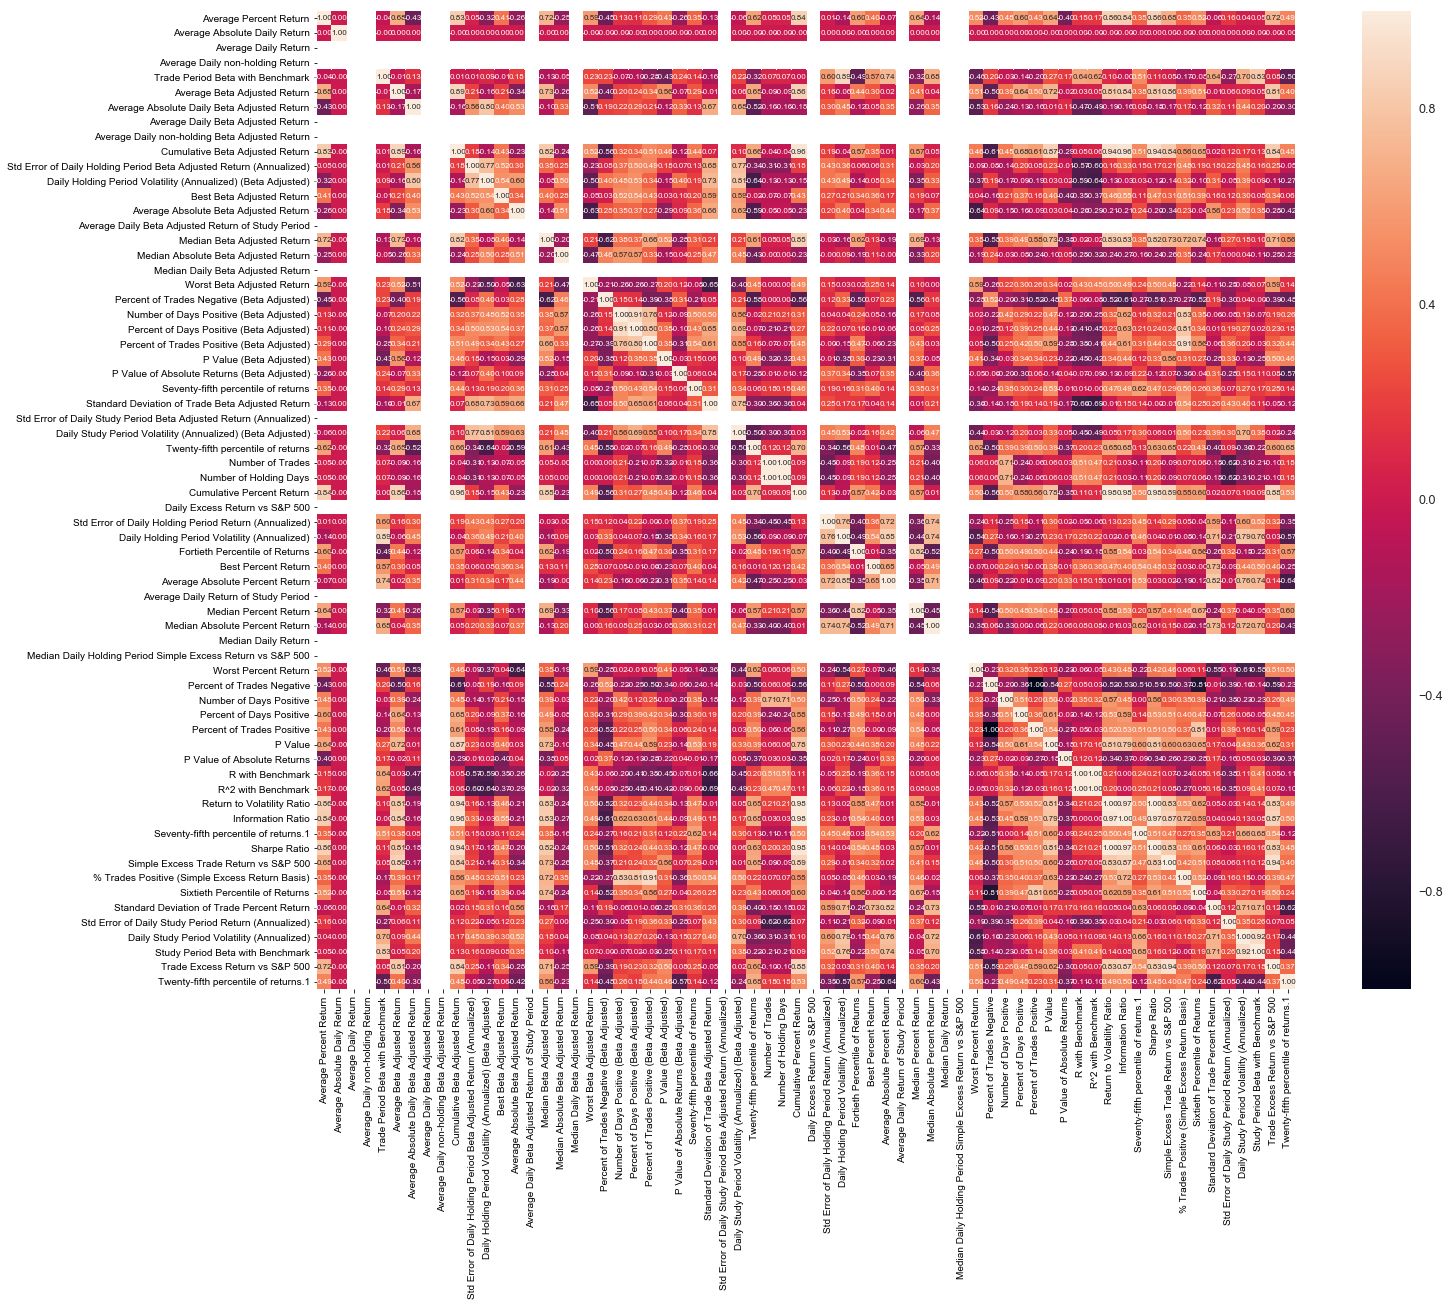

In [11]:
f, ax = plt.subplots(figsize=(24,18))
k=10
cols = correls_df1.nlargest(10, columns=['Cumulative Beta Adjusted Return'])['Cumulative Beta Adjusted Return'].index
cm = np.corrcoef(correls_df1[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(correls_df1, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size':8})
#            xticklabels=cols.values,yticklabels=cols.values);
plt.show();

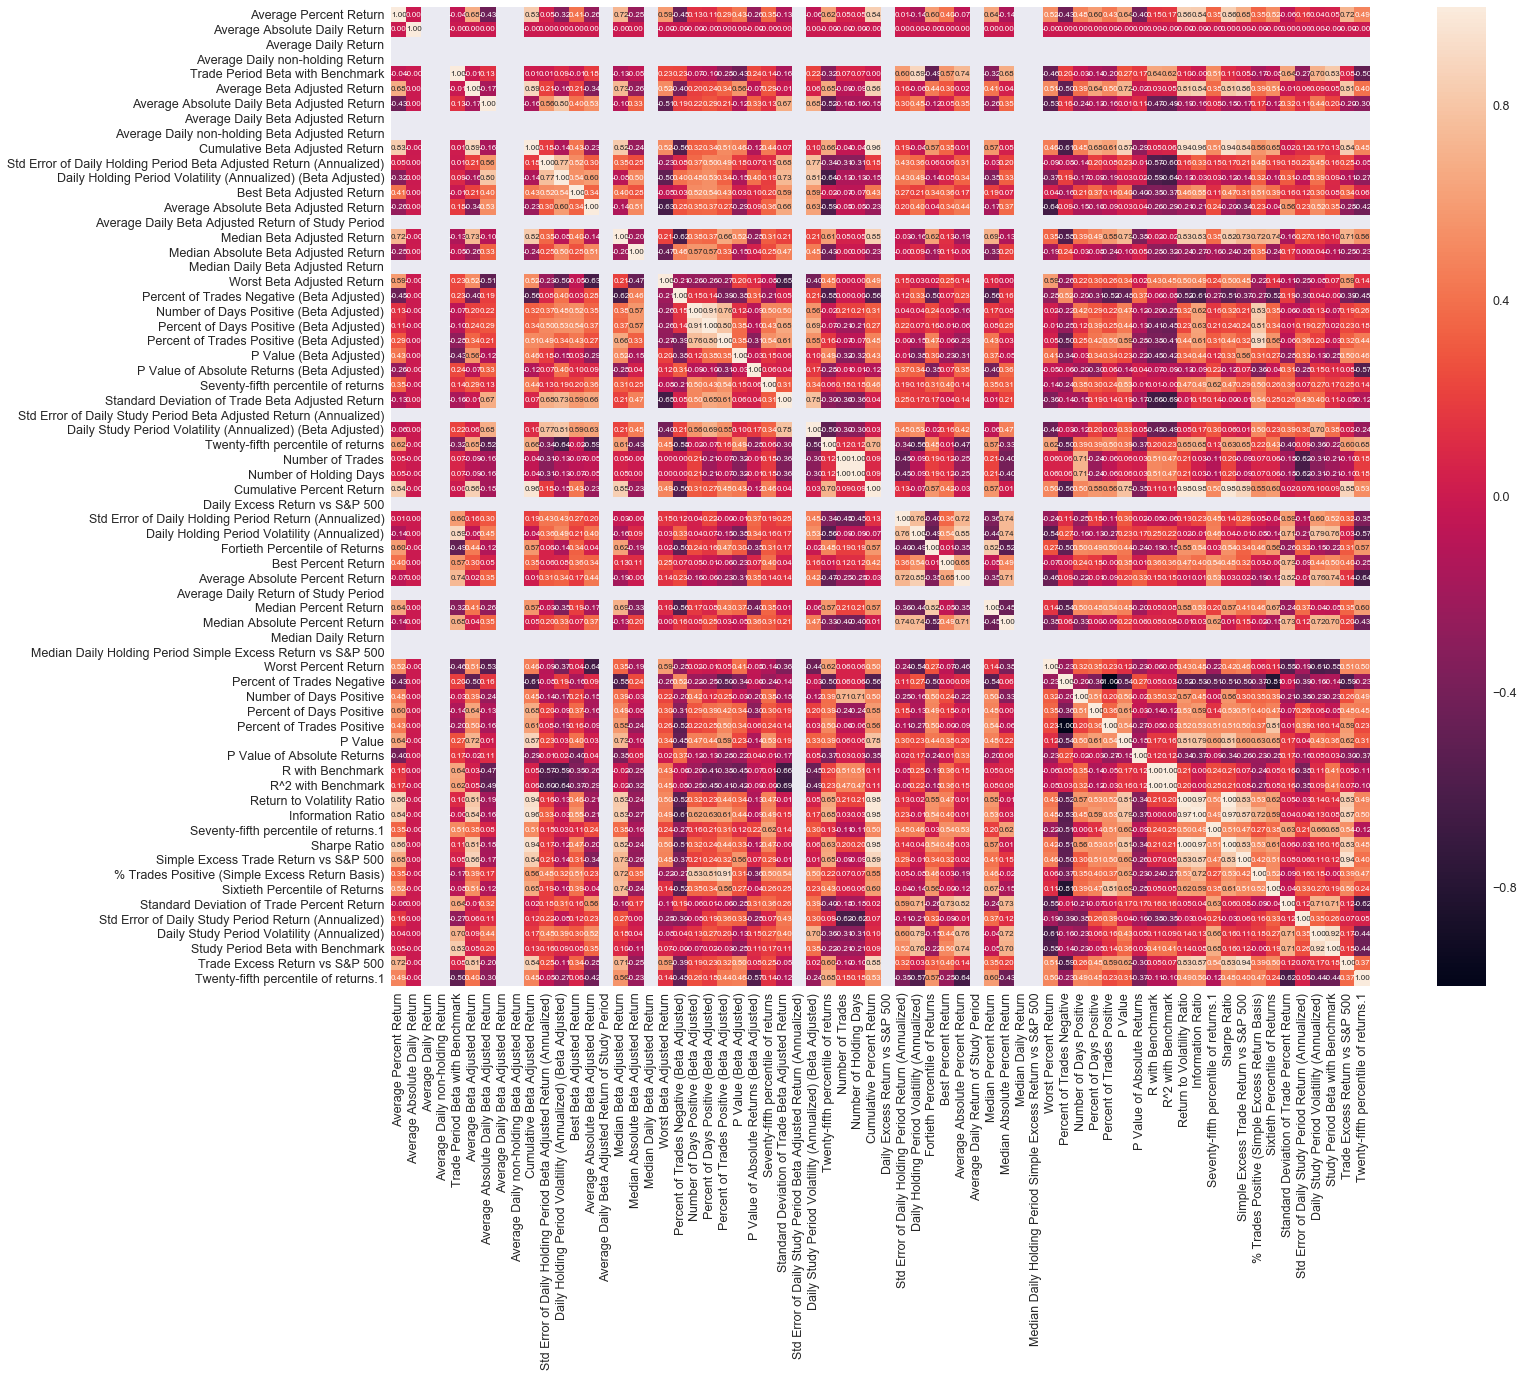

In [12]:
plot_data = correls_df2

f, ax = plt.subplots(figsize=(24,18))
k=10
cols = plot_data.nlargest(10, columns=['Cumulative Beta Adjusted Return'])['Cumulative Beta Adjusted Return'].index
cm = np.corrcoef(plot_data[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(correls_df1, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size':8})
#            xticklabels=cols.values,yticklabels=cols.values);
plt.show();

In [13]:
for cols in correls_df2.columns:
    print(''.join(cols))

Average Percent Return
Average Absolute Daily Return
Average Daily Return
Average Daily non-holding Return
Trade Period Beta with Benchmark
Average Beta Adjusted Return
Average Absolute Daily Beta Adjusted Return
Average Daily Beta Adjusted Return
Average Daily non-holding Beta Adjusted Return
Cumulative Beta Adjusted Return
Std Error of Daily Holding Period Beta Adjusted Return (Annualized)
Daily Holding Period Volatility (Annualized) (Beta Adjusted)
Best Beta Adjusted Return
Average Absolute Beta Adjusted Return
Average Daily Beta Adjusted Return of Study Period
Median Beta Adjusted Return
Median Absolute Beta Adjusted Return
Median Daily Beta Adjusted Return
Worst Beta Adjusted Return
Percent of Trades Negative (Beta Adjusted)
Number of Days Positive (Beta Adjusted)
Percent of Days Positive (Beta Adjusted)
Percent of Trades Positive (Beta Adjusted)
P Value (Beta Adjusted)
P Value of Absolute Returns (Beta Adjusted)
Seventy-fifth percentile of returns
Standard Deviation of Trade Beta

In [14]:
#correls_df2[['P Value','Cumulative Percent Return']]
df2[['P Value','Cumulative Percent Return','Sharpe Ratio','Information Ratio']]

,P Value,Cumulative Percent Return,Sharpe Ratio,Information Ratio
Symbol,,,,
AXON,0.22,63.40,7.97,9.01
STRP,0.56,141.83,2.66,2.79
ADPT,0.74,74.53,2.71,2.52
RYI,0.29,58.00,4.19,4.65
NHTC,0.01,317.13,4.76,4.68
SALE,0.07,64.49,3.52,4.16
BPMC,0.08,38.90,6.98,8.19
XBIT,0.04,35.41,9.03,8.38
NVRO,0.61,44.29,4.36,4.76


In [21]:
correls_df2['P Value'].head(10).sort_values(ascending=True)
correls_df2['P Value'].tail(10).sort_values(ascending=False)

Average Daily non-holding Return                 -0.084464
Average Daily non-holding Beta Adjusted Return   -0.083838
Trade Period Beta with Benchmark                  0.016278
Average Absolute Daily Return                     0.027341
Average Absolute Daily Beta Adjusted Return       0.030759
Cumulative Beta Adjusted Return                   0.254822
Average Percent Return                            0.320371
Average Beta Adjusted Return                      0.321885
Average Daily Return                              0.325469
Average Daily Beta Adjusted Return                0.327602
Name: P Value, dtype: float64

Sharpe Ratio                                           0.444748
% Trades Positive (Simple Excess Return Basis)         0.349654
Trade Excess Return vs S&P 500                         0.317082
Simple Excess Trade Return vs S&P 500                  0.311976
Sixtieth Percentile of Returns                         0.230477
Twenty-fifth percentile of returns.1                   0.203762
Standard Deviation of Trade Percent Return             0.032667
Std Error of Daily Study Period Return (Annualized)    0.027801
Daily Study Period Volatility (Annualized)            -0.034601
Study Period Beta with Benchmark                      -0.045678
Name: P Value, dtype: float64

In [25]:
#correls_df2['Cumulative Beta Adjusted Return'].head(10).sort_values(ascending=True)
#correls_df2['Cumulative Beta Adjusted Return'].tail(10).sort_values(ascending=False)
correls_df2['Cumulative Beta Adjusted Return'].sort_values(ascending=False)

Cumulative Beta Adjusted Return                                        1.000000
Cumulative Percent Return                                              0.987980
Average Beta Adjusted Return                                           0.839906
Average Daily Beta Adjusted Return                                     0.838298
Trade Excess Return vs S&P 500                                         0.837188
Average Percent Return                                                 0.835729
Average Daily Return                                                   0.835270
Simple Excess Trade Return vs S&P 500                                  0.831842
Daily Excess Return vs S&P 500                                         0.831645
Return to Volatility Ratio                                             0.755433
Sharpe Ratio                                                           0.749880
Information Ratio                                                      0.708964
Sixtieth Percentile of Returns          

In [16]:
f = figure(tools=TOOLS,
          title='P Value vs. Information Ratio')

data = df2
x = 'Information Ratio'
y = 'P Value'

f.circle(x=data[x],
        y=data[y],
        color='blue',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [17]:
f = figure(tools=TOOLS,
          title='P Value vs. Sharpe Ratio')

data = df2
x = 'Sharpe Ratio'
y = 'P Value'

f.circle(x=data[x],
        y=data[y],
        color='blue',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [34]:
f = figure(tools=TOOLS,
          title='Cumulative Beta Adjusted Return vs. P Value')

data = df2
x = 'Cumulative Beta Adjusted Return'
y = 'P Value'

f.circle(x=data[x],
        y=data[y],
        color='blue',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [33]:
f = figure(tools=TOOLS,
          title='Cumulative Beta Adjusted Return vs. Information Ratio')

data = df2
x = 'Cumulative Beta Adjusted Return'
y = 'Information Ratio'

f.circle(x=data[x],
        y=data[y],
        color='blue',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [32]:
f = figure(tools=TOOLS,
          title='Cumulative Beta Adjusted Return vs. Return to Volatility Ratio')

data = df2
x = 'Cumulative Beta Adjusted Return'
y = 'Return to Volatility Ratio'

f.circle(x=data[x],
        y=data[y],
        color='black',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [35]:
f = figure(tools=TOOLS,
          title='Cumulative Beta Adjusted Return vs. Number of Trades')

data = df2
x = 'Cumulative Beta Adjusted Return'
y = 'Number of Trades'

f.circle(x=data[x],
        y=data[y],
        color='black',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [36]:
f = figure(tools=TOOLS,
          title='P Value vs. Number of Trades')

data = df2
x = 'P Value'
y = 'Number of Trades'

f.circle(x=data[x],
        y=data[y],
        color='black',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [37]:
f = figure(tools=TOOLS,
          title='Information Ratio vs. Number of Trades')

data = df2
x = 'Information Ratio'
y = 'Number of Trades'

f.circle(x=data[x],
        y=data[y],
        color='black',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);

In [38]:
f = figure(tools=TOOLS,
          title='Sharpe Ratio vs. Number of Trades')

data = df2
x = 'Sharpe Ratio'
y = 'Number of Trades'

f.circle(x=data[x],
        y=data[y],
        color='black',
         alpha=0.2,
         size=5)
f.xaxis.axis_label = x
f.yaxis.axis_label = y



show(f);